In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def rc_parallel(c,r,v,t):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    def i_res(r,v):
        return(v/r)
    
    icap = i_cap(c,v,t)
    ires = i_res(r,v)
    return([icap+ires,icap,ires])

def basic_memristor(i,t,ron,roff,u,d,x):
    'basic model for a memristor, input a time and current array with inital conditions and paramater to get voltage out'
    
    def dx(x,i,ron,u,d,dt):
        'finds the change in the boundary postiton after a time dt'
        k = u*ron/(d**2)
        dum = k*x*(1-x)*(i)*dt
        return dum
    def volts(ron,roff,i,x):
        'finds the voltage'
        dum=roff*i
        dum1=(ron-roff)*x*i
        return (dum+dum1)
    out = []
    for j in range(len(t)):
        if j!=0:
            dt=(t[j]-t[j-1])
            change = dx(x,i[j],ron,u,d,dt)
            x=x+change
            out.append(volts(ron,roff,i[j],x))
        else:
            out.append(volts(ron,roff,i[j],x))
    return(out)

def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship):
    'Memristor model based on the VTEAM model, input paramaters are'
    def johleker(x,p):
        return(1-(((2*x)-1)**(2*p)))
    
    def biolek(x,p,i):
        if -i >= 0:
            return(1-((x-1)**(2*p)))
        else:
            return(1-(x**(2*p)))

    def prodromakis(x,p,j):
        dum=(x-0.5)**2
        dum1=(dum+0.75)**p
        return(j*(1-dum1))
    
    def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
        if 0<voff<v:
            dum = koff*(((v/voff)-1)**aoff)
            if foff == 'prodromakis':
                func = prodromakis(x,p,j)
            if foff == 'johleker':
                func = johleker(x,p)
            return(dum*func*dt)
        
        if von<v<voff:
            return(0)
        
        if v<von<0:
            dum = kon*(((v/von)-1)**aon)
            if fon == 'prodromakis':
                func = prodromakis(x,p,j)
            if fon == 'johleker':
                func = johleker(x,p)
            return(dum*func*dt)
        
        else: 
            return(0)
        
    def  linear(roff,ron,woff,won,v,w):
        dum = (roff-ron)/(woff-won)
        dum1 = ((ron+dum)*(w-won))**(-1)
        return((dum1*v))
    
    
    out=[]
    boundarypos=[]
    if relationship == 'linear':
        rel = linear
    for k in range(len(t)):
        if k!=0:
            dt= (t[k]-t[k-1])
            change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
            w=w+change
            out.append(rel(roff,ron,woff,won,v[k],w))
            boundarypos.append(w)
        else:
            out.append(rel(roff,ron,woff,won,v[k],w))
            boundarypos.append(w)
    return(out,boundarypos)

In [3]:
def mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship):
        'Memristor model based on the VTEAM model, input paramaters are'
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def biolek(x,p,i):
            if -i >= 0:
                return(1-((x-1)**(2*p)))
            else:
                return(1-(x**(2*p)))

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))

        def dw(v,koff,kon,aoff,aon,voff,von,x,p,j,dt):
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            #dum1 = ((ron+dum)*(w-won))**(-1)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
        return(out,boundarypos)
    
    icap = i_cap(c,v,t)
    imem = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[0]
    membounary = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[1]
    
    out = []
    for i in range(len(imem)):
        out.append(icap[i]+imem[i])
    return([out,icap,imem,membounary])

In [4]:
c =0.75e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

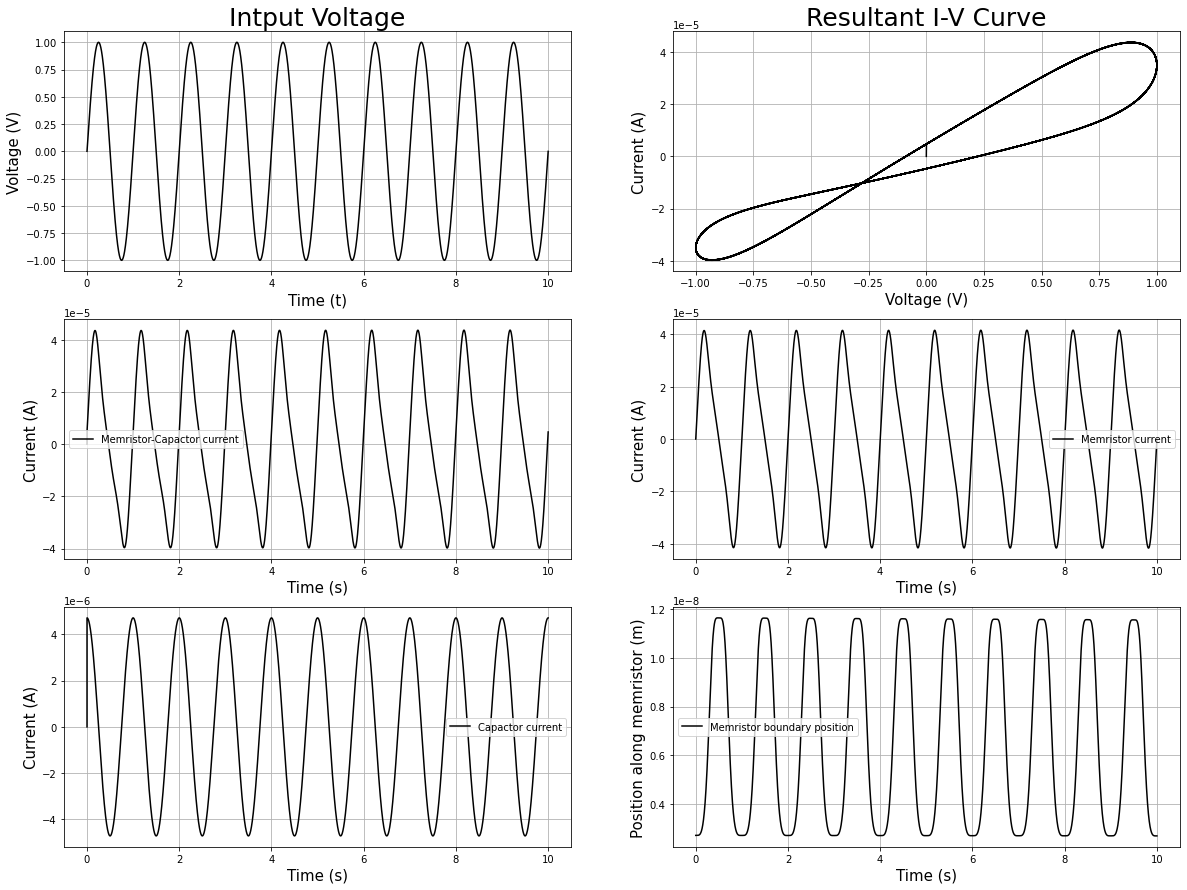

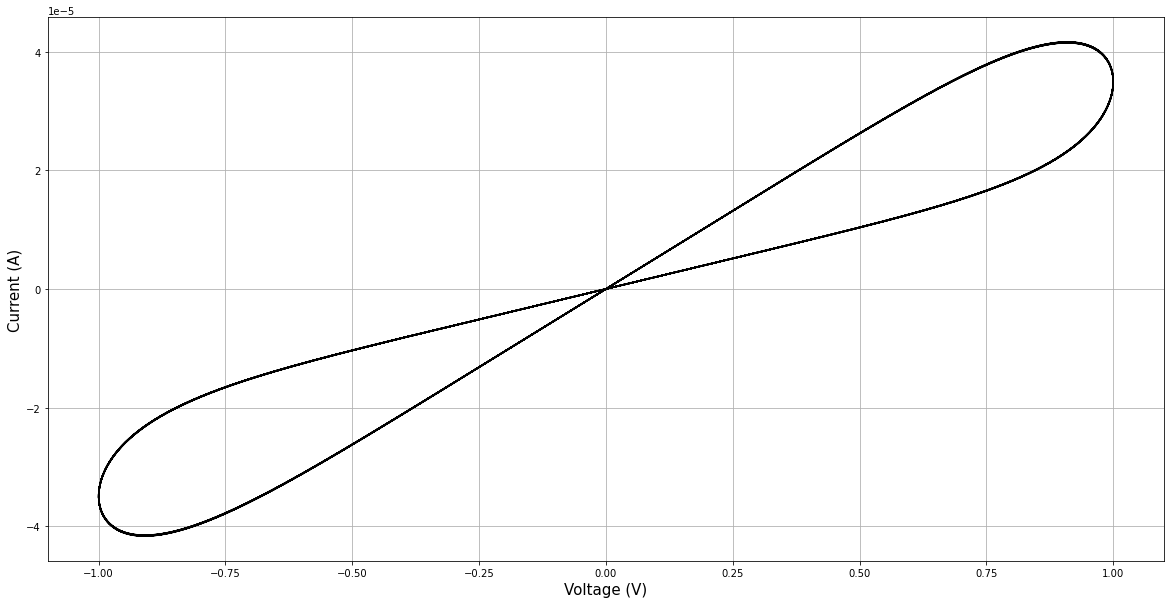

In [5]:
plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

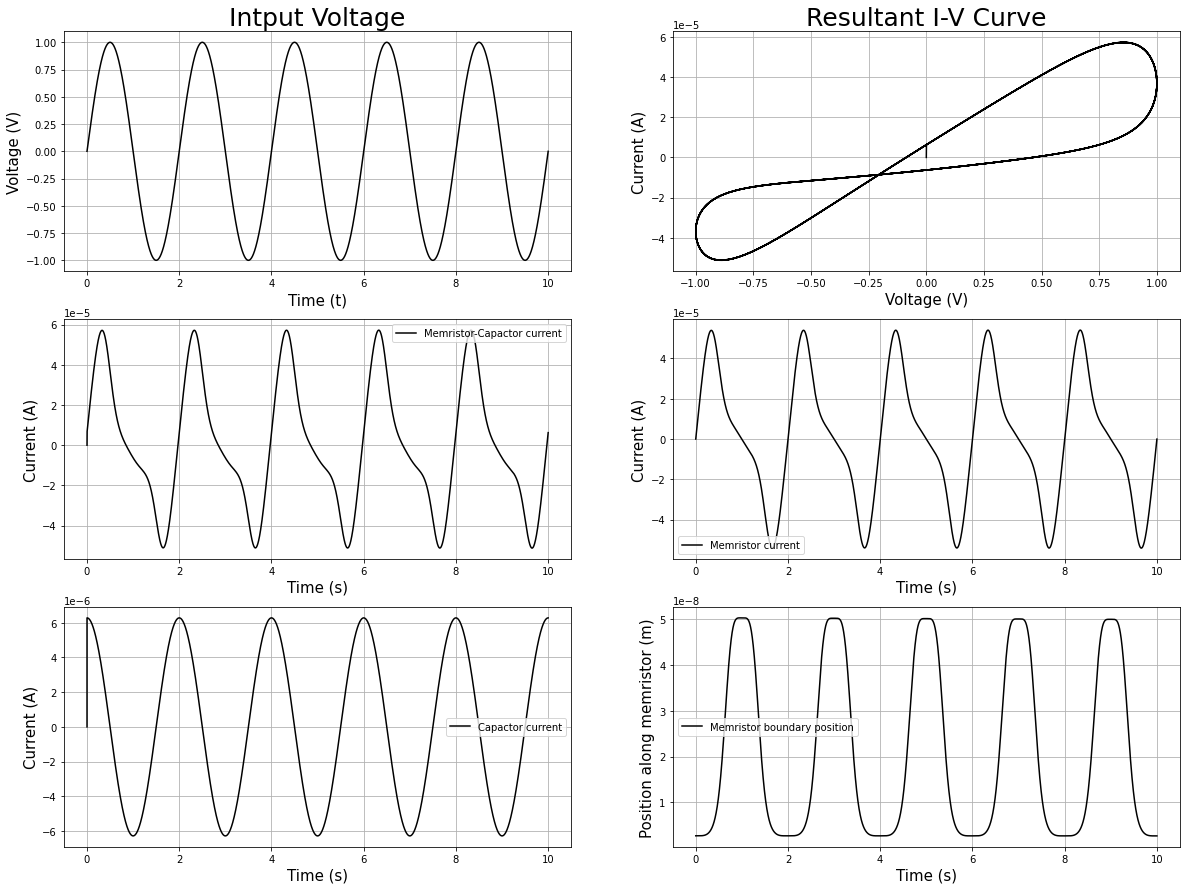

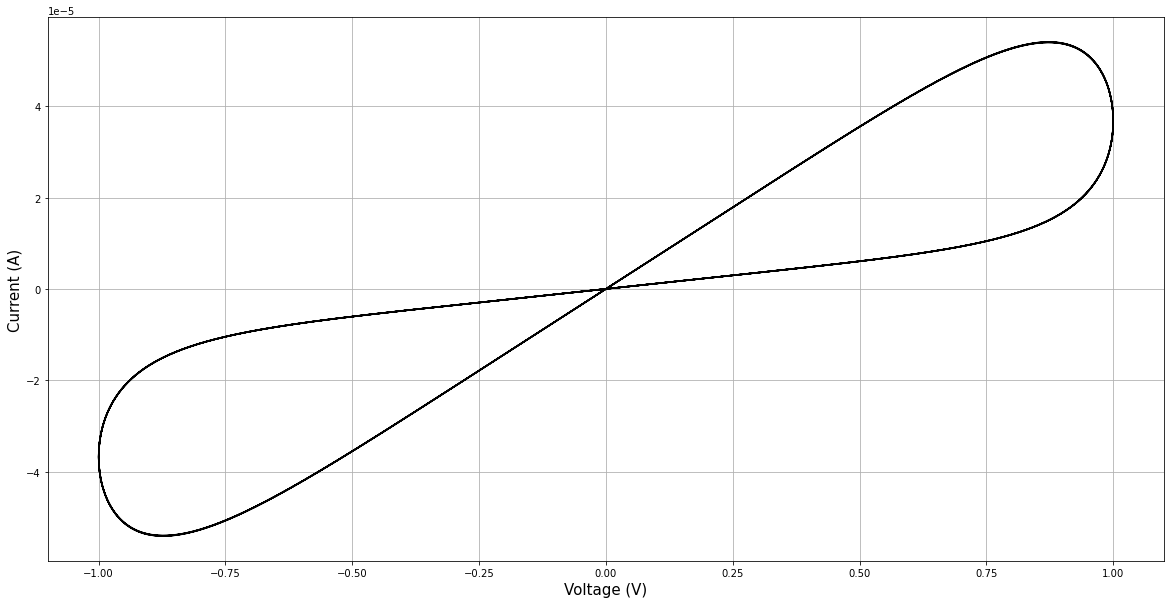

In [6]:
c =2e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 50e3
ron = 10e3
p = 1
j = 10

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

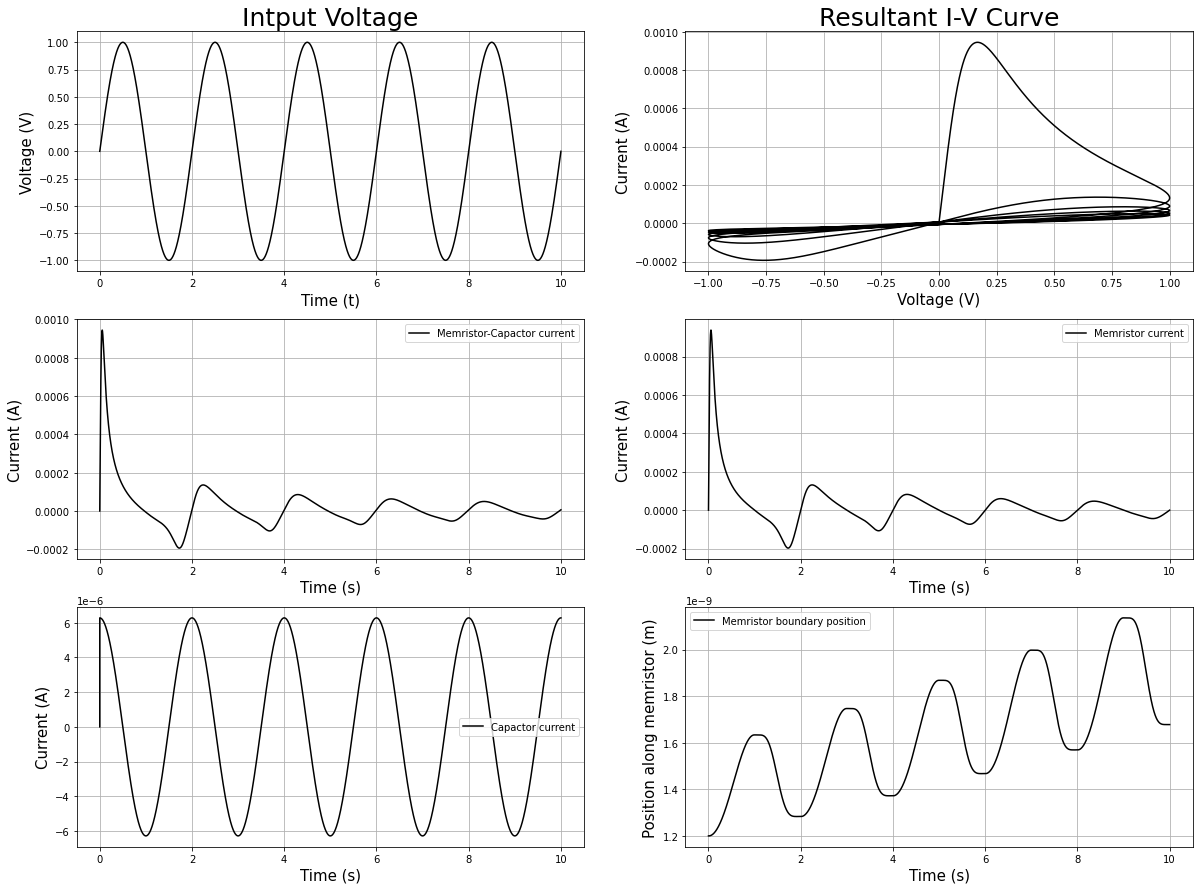

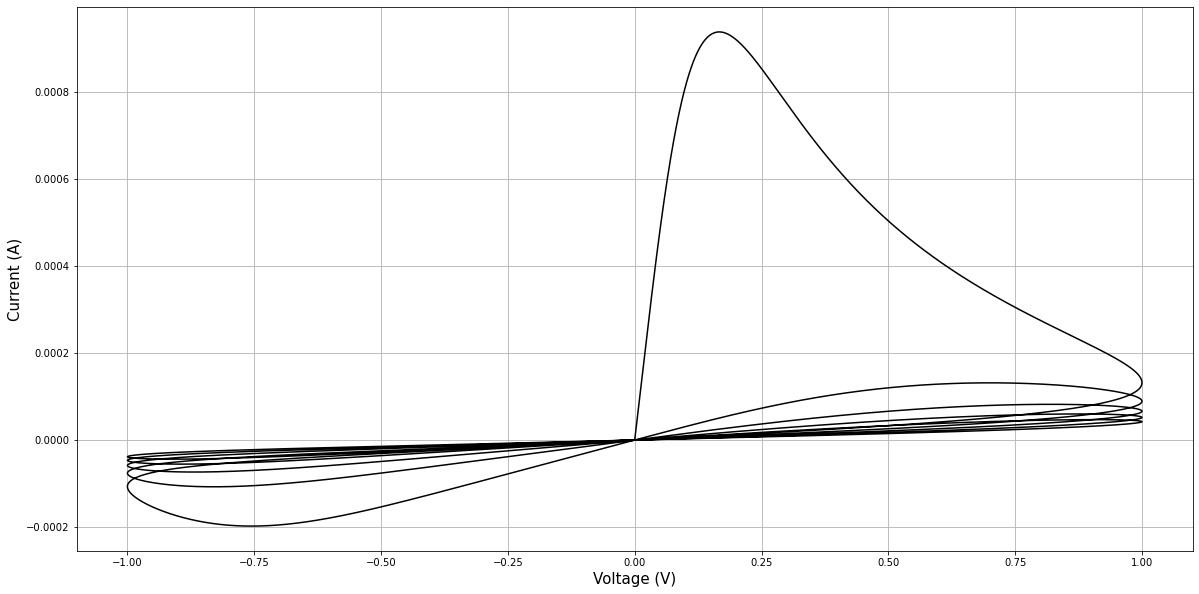

In [7]:
c =2e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = 1.2e-9
won = 1.2e-9
woff = 2e-9
koff = 1e-3
kon = -1e-3
aoff = 1
aon = 3
voff = 00.02
von = -0.2
roff = 30e3
ron = 100
p = 1
j = 10

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

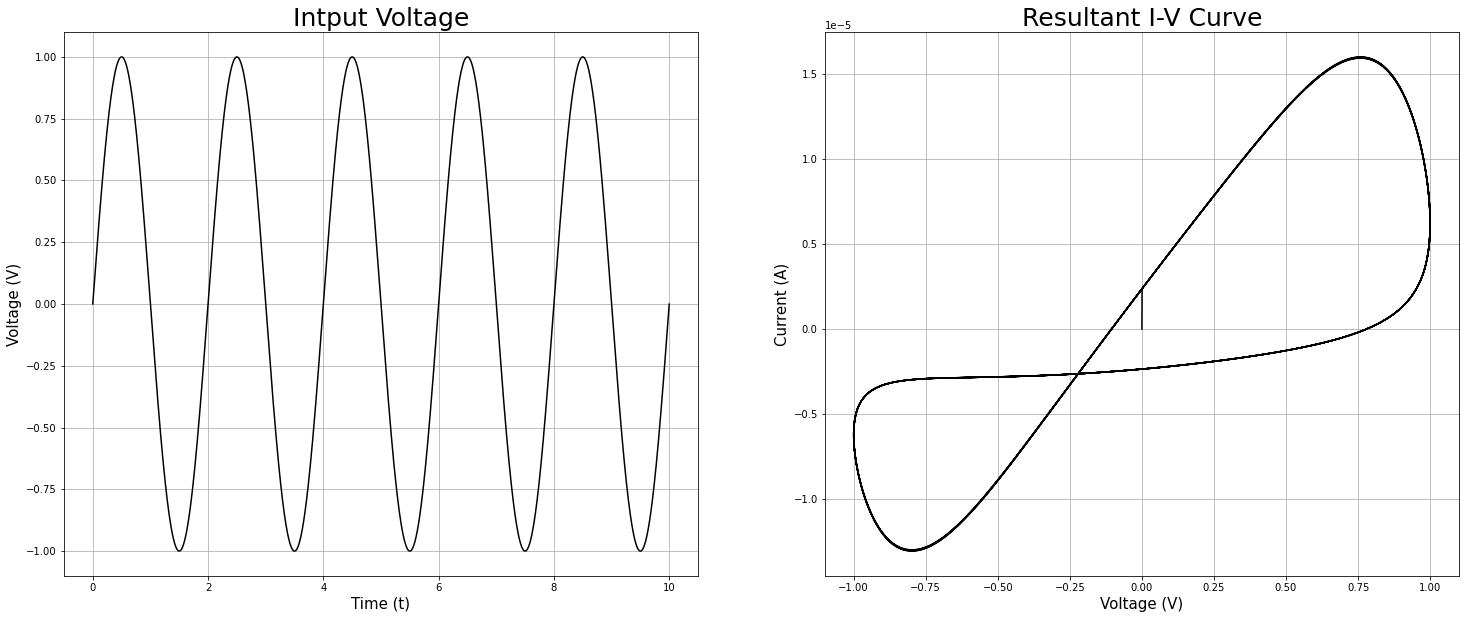

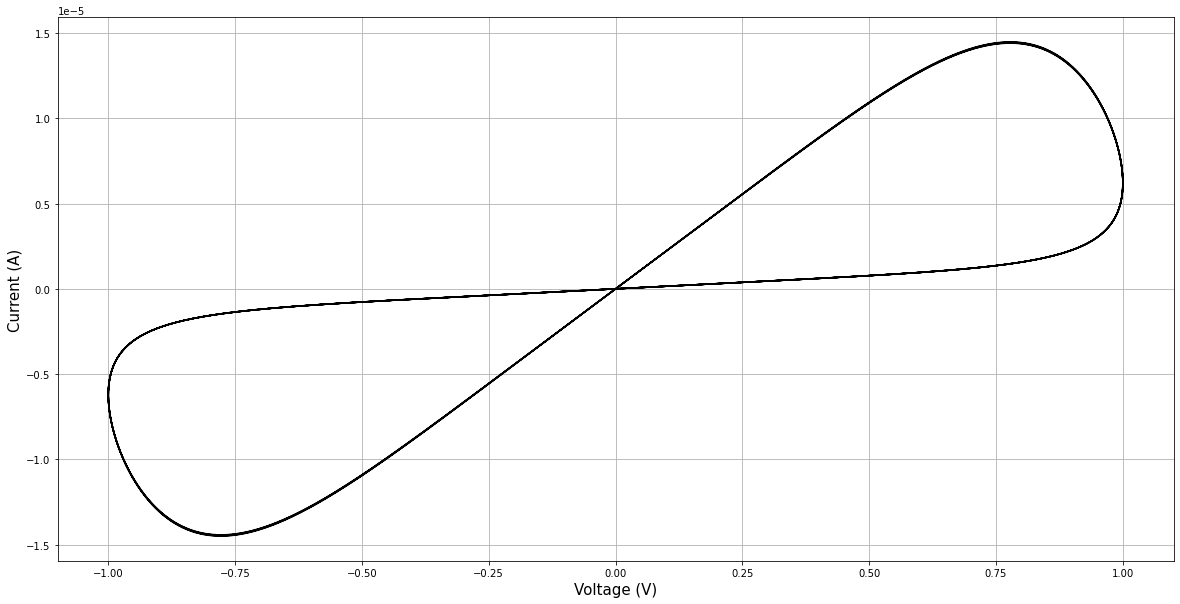

In [25]:
c =0.75e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = 23.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 50e3
ron = 10e3
p = 1
j = 10

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(1,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.show()
plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

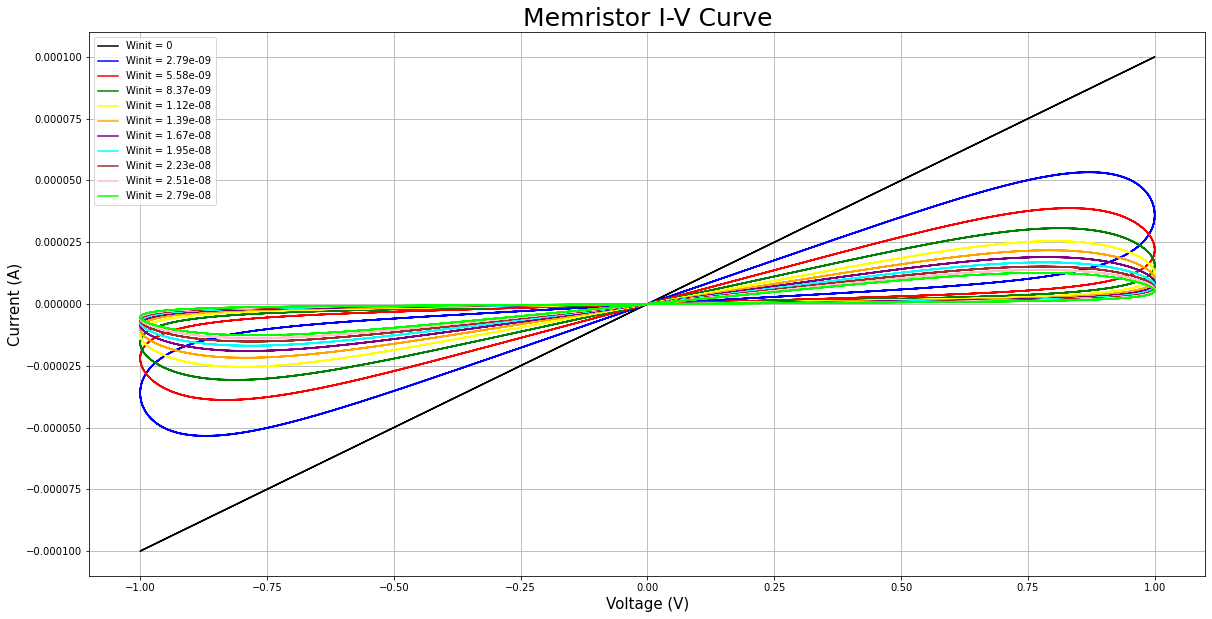

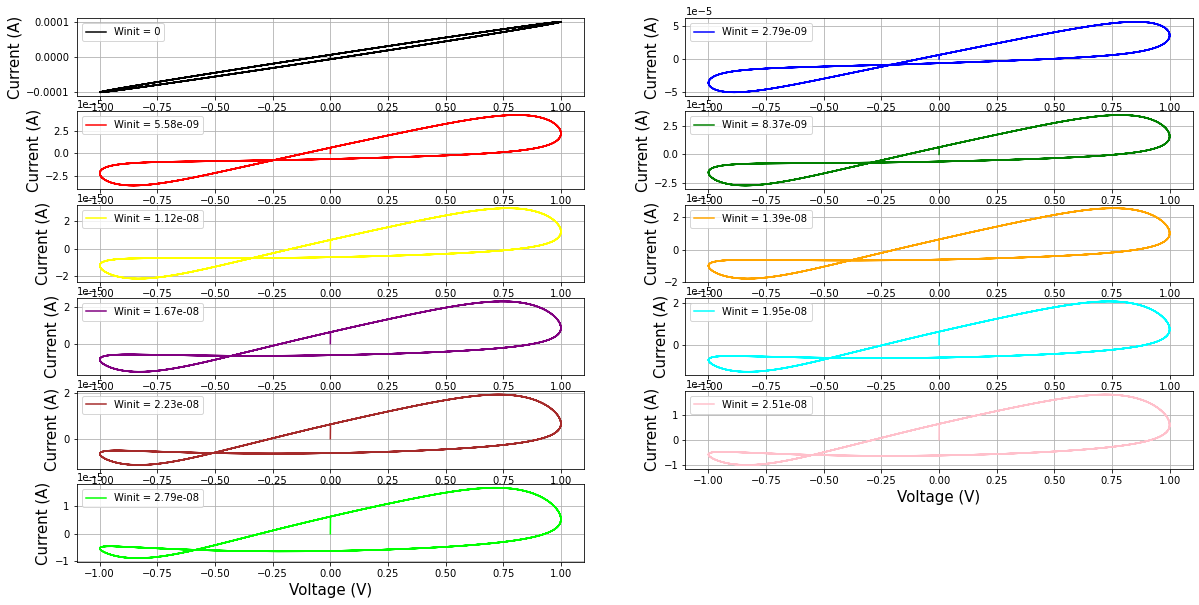

In [9]:
c =2e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = np.linspace(0,27.9e-9,11)
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 50e3
ron = 10e3
p = 1
j = 10

col=['black','blue','red','green','yellow','orange','purple','cyan','brown','pink','lime']

plt.figure(figsize=(20,10))
plt.title('Memristor I-V Curve',fontsize=25)
for i in range(len(w)):
    current = mc_parallel(c,v,t,w[i],koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)
    
    plt.plot(v,current[2],color=col[i],label='Winit = '+str('%.3g' %w[i]))
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.legend()
plt.show()   

plt.figure(figsize=(20,10))
plt.title('Resultant I-V Curve',fontsize=25)
for i in range(len(w)):
    current = mc_parallel(c,v,t,w[i],koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)
    plt.subplot(6,2,i+1)
    plt.plot(v,current[0],color=col[i],label='Winit = '+str('%.3g' %w[i]))
    plt.legend()
    plt.ylabel('Current (A)',fontsize=15)
    plt.xlabel('Voltage (V)',fontsize=15)
    plt.grid()
plt.show()

In [10]:
c =np.linspace(1e-6,10e-6,10)
t = np.arange(0,10,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = 2.51e-8
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 50e3
ron = 10e3
p = 1
j = 10

col=['black','blue','red','green','yellow','orange','purple','cyan','brown','pink','lime']

data=[]
for i in range(len(c)):
    data.append(mc_parallel(c[i],v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j))

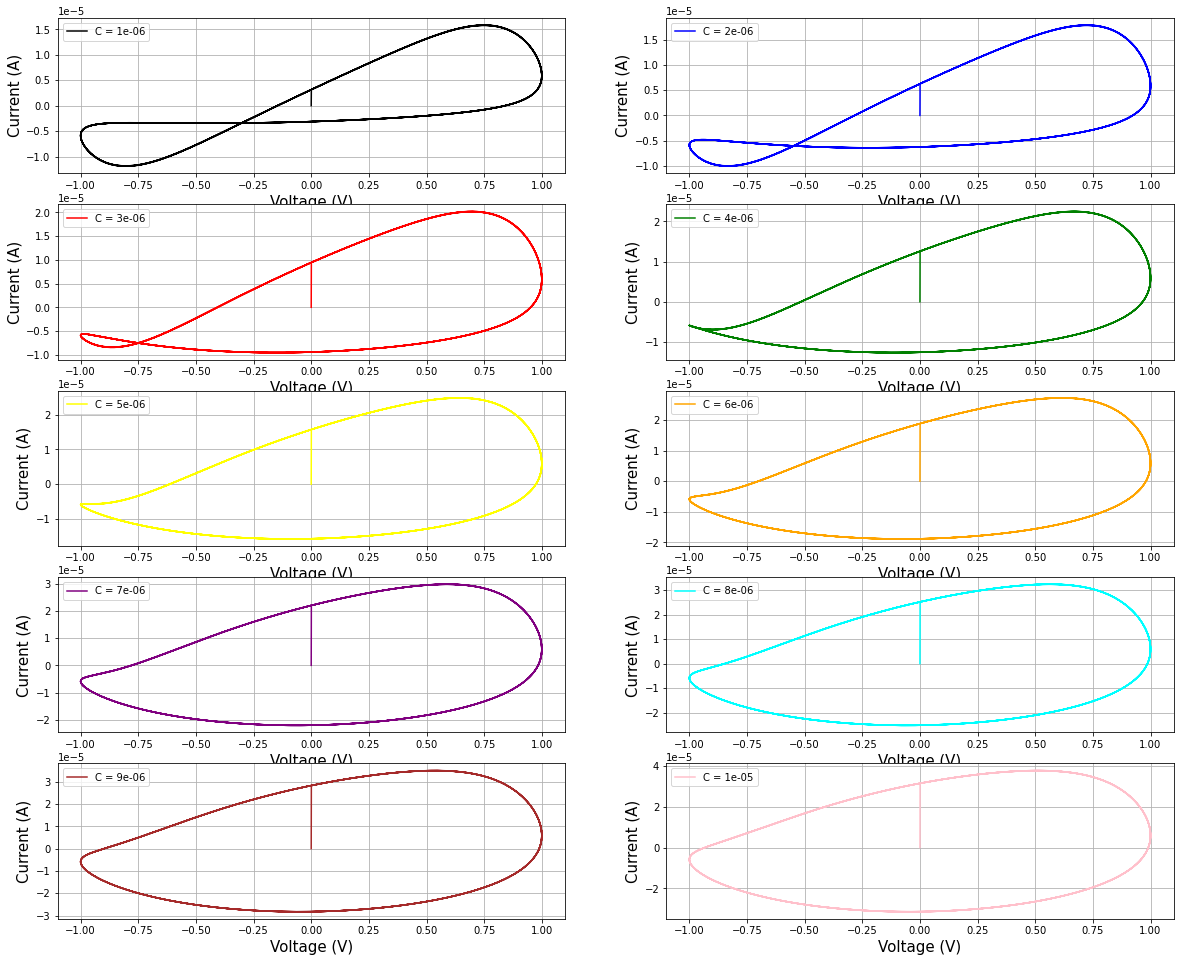

In [11]:
plt.figure(figsize=(20,20))
plt.title('Resultant I-V Curve',fontsize=25)
for i in range(len(data)):
    plt.subplot(6,2,i+1)
    plt.plot(v,data[i][0],color=col[i],label='C = '+str('%.3g' %c[i]))
    plt.legend()
    plt.ylabel('Current (A)',fontsize=15)
    plt.xlabel('Voltage (V)',fontsize=15)
    plt.grid()
plt.show()

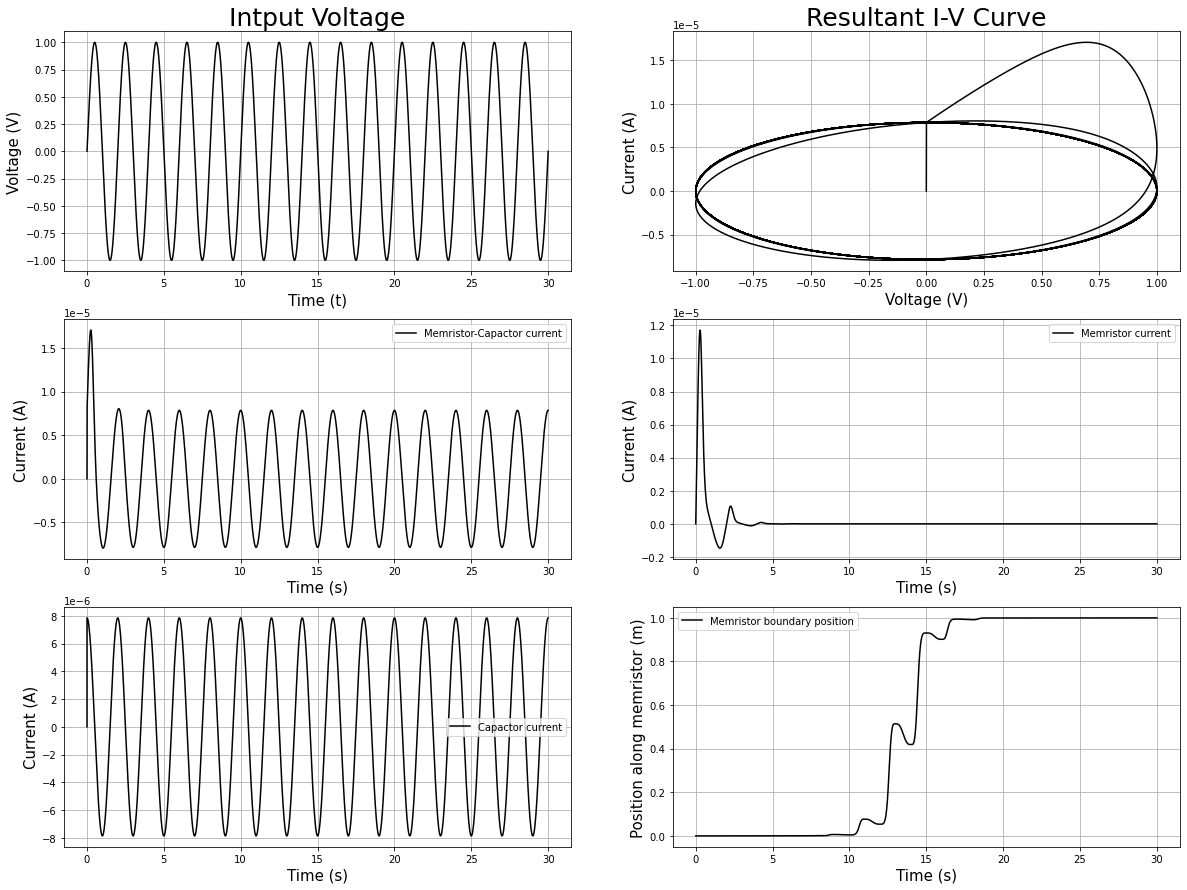

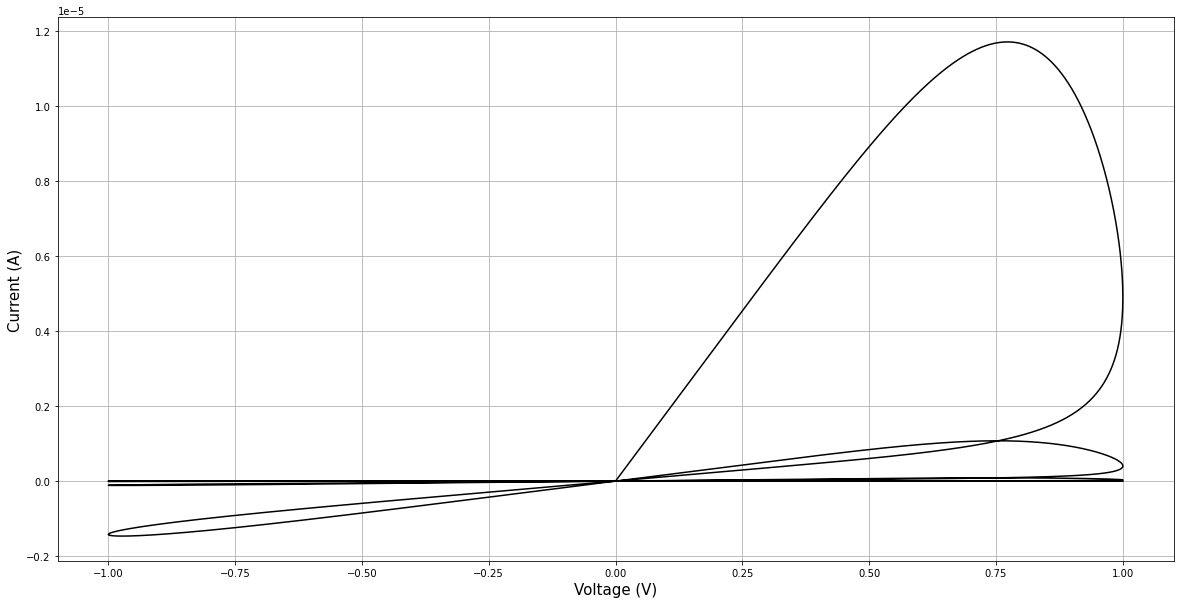

In [12]:
c =2.5e-6
t = np.arange(0,30,0.0001)
v0 = 1
f = 0.5
v = v0*np.sin(math.pi*2*f*t)
w = 13.5e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)

plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()

In [13]:
def mc_parallel_2(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship):
        'Memristor model based on the VTEAM model, input paramaters are'
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def biolek(x,p,i):
            if -i >= 0:
                return(1-((x-1)**(2*p)))
            else:
                return(1-(x**(2*p)))

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))

        def dw(v,koff,kon,aoff,aon,voff,von,woff,won,x,p,j,dt):
            state = x/(woff-won)
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(state,p,j)
                if foff == 'johleker':
                    func = johleker(state,p)
                return(dum*func*dt)

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(state,p,j)
                if fon == 'johleker':
                    func = johleker(state,p)
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            #dum1 = ((ron+dum)*(w-won))**(-1)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v))


        out=[]
        boundarypos=[]
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w))
                boundarypos.append(w)
        return(out,boundarypos)
    
    icap = i_cap(c,v,t)
    imem = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[0]
    membounary = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[1]
    
    out = []
    for i in range(len(imem)):
        out.append(icap[i]+imem[i])
    return([out,icap,imem,membounary])

C:\Users\harry\AppData\Local\Temp/ipykernel_11864/2827827905.py:24: RuntimeWarning: overflow encountered in double_scalars
  dum=(x-0.5)**2
C:\Users\harry\AppData\Local\Temp/ipykernel_11864/2827827905.py:68: RuntimeWarning: invalid value encountered in double_scalars
  w=w+change


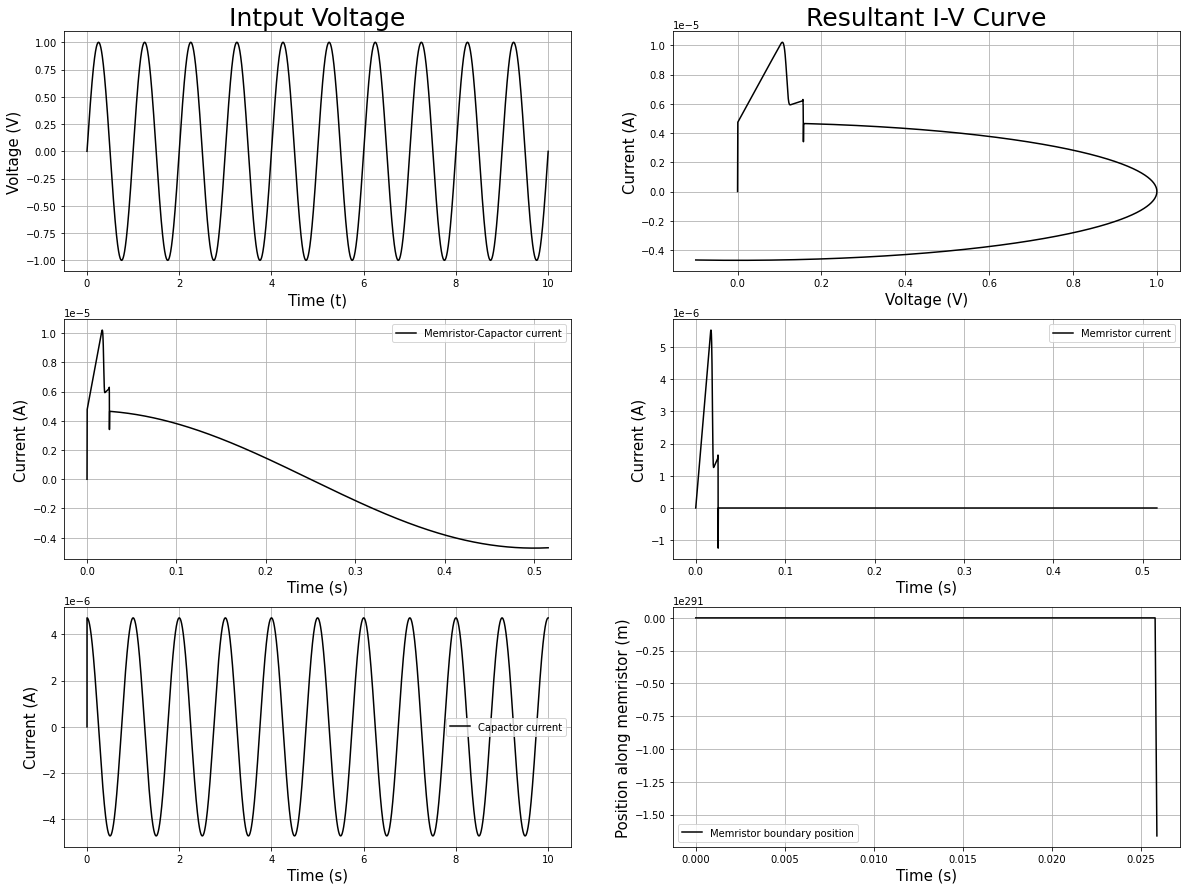

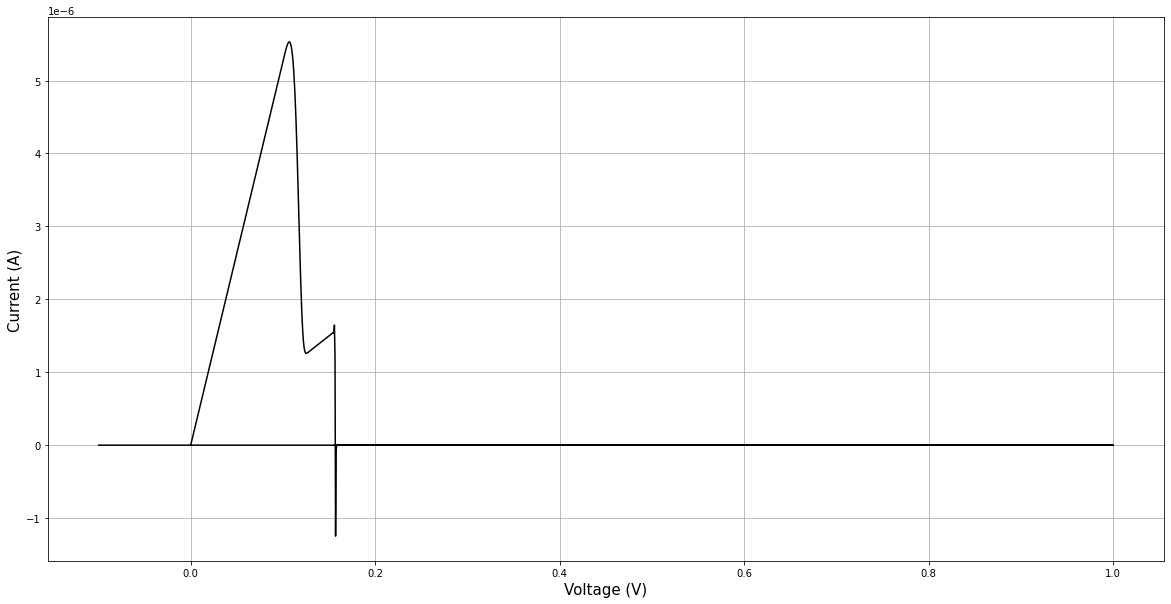

In [14]:
c =0.75e-6
t = np.arange(0,10,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 2.7e-9
won = 0
woff = 27e-9
koff = 1e-3
kon = -1e-3
aoff = 3
aon = 3
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 1
j = 10

current = mc_parallel_2(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j)



plt.figure(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Intput Voltage',fontsize=25)
plt.plot(t,v,color='black',label='Input Voltage')
plt.ylabel('Voltage (V)',fontsize=15)
plt.xlabel('Time (t)',fontsize=15)
plt.grid()

plt.subplot(3,2,2)
plt.title('Resultant I-V Curve',fontsize=25)
plt.plot(v,current[0],label='I-V Curve',color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()

plt.subplot(3,2,3)
plt.plot(t,current[0],color='black',label='Memristor-Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,4)
plt.plot(t,current[2],color='black',label='Memristor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,5)
plt.plot(t,current[1],color='black',label='Capactor current')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.subplot(3,2,6)
plt.plot(t,current[3],color='black',label='Memristor boundary position')
plt.ylabel('Position along memristor (m)',fontsize=15)
plt.xlabel('Time (s)',fontsize=15)
plt.grid()
plt.legend()

plt.show()

plt.figure(figsize=(20,10))
plt.plot(v,current[2],color='black')
plt.ylabel('Current (A)',fontsize=15)
plt.xlabel('Voltage (V)',fontsize=15)
plt.grid()
plt.show()